# THE SPARKS FOUNDATION
#GRIPJAN21

TASK 3 - Exploratory Data Analysis’ on dataset ‘SampleSuperstore

This notebook contain treditional methos as well as some thing called automated EDA

Code written by - Vipin Vishal

In [1]:
# Importing relevant libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

plt.style.use('ggplot')

from scipy import stats
from scipy.stats import norm, skew

# Hide Warnings
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Reading the csv file
data = pd.read_csv("SampleSuperstore.csv")

In [9]:
data.head()

Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164

In [10]:
# some mathematics insights
data.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

In [11]:
# Shape of the data
data.shape

(9994, 13)

In [12]:
# total number of feature
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [13]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

It can be clearly seen that for 3 categories(total subcategories are 17) of products there are only 4 types of shipping modes in 4 different regions among 49 different states of the same country. Also there are only 3 segments among whom the products are distributed

In [14]:
# checking missing values in data set
data.isnull().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [15]:
# to check co-relation B/W features
correlation = data.corr()
correlation

Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023854  0.012761  0.058443 -0.029961
Sales          -0.023854  1.000000  0.200795 -0.028190  0.479064
Quantity        0.012761  0.200795  1.000000  0.008623  0.066253
Discount        0.058443 -0.028190  0.008623  1.000000 -0.219487
Profit         -0.029961  0.479064  0.066253 -0.219487  1.000000

In [16]:
#Dropping the columns which is not participating in dataset truly 
data.drop(['Postal Code', 'Country'], axis=1, inplace=True)

# Visualizations

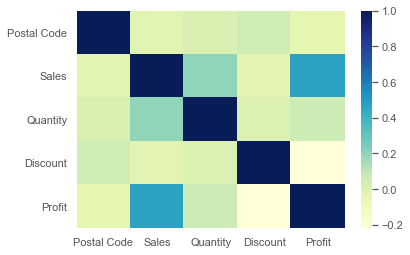

In [18]:
sns.heatmap(correlation, cmap="YlGnBu" )

## Now lets see the relationships b/w feature via using pairplot function

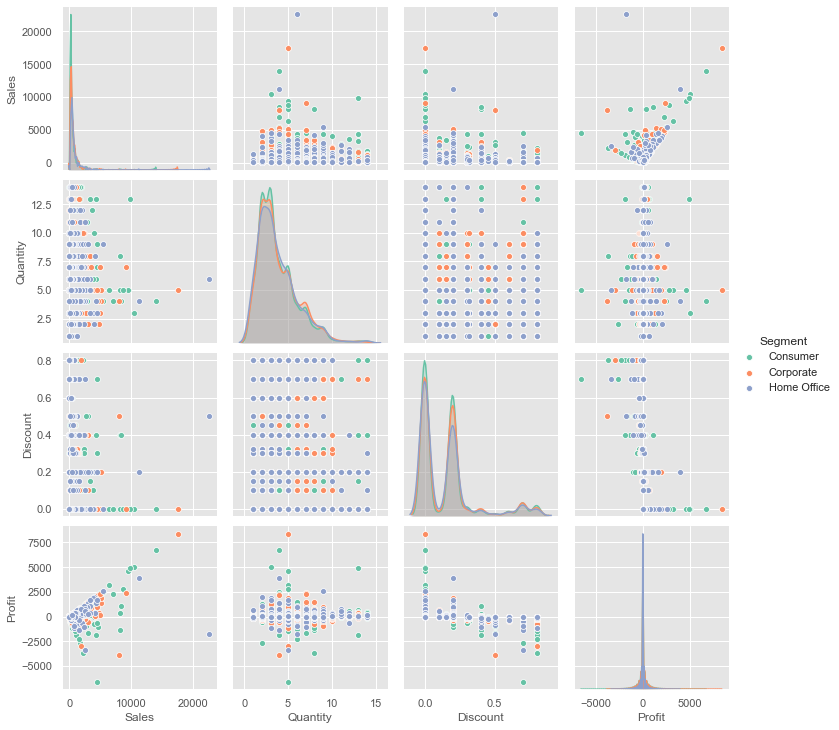

In [19]:
#based on Segment
sns.pairplot(data, hue="Segment", palette="Set2")
plt.show()

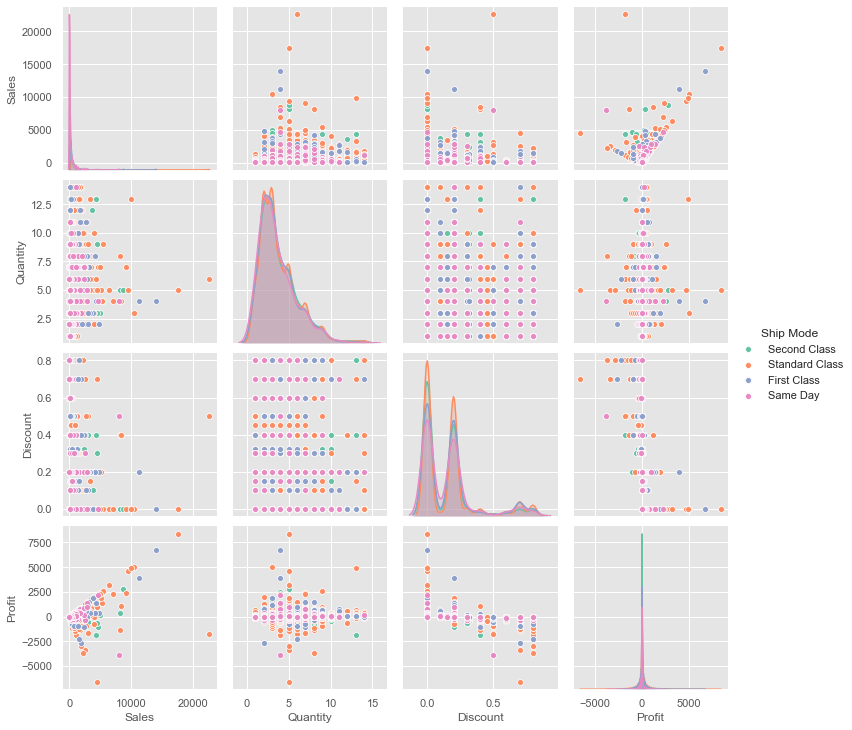

In [20]:
#based on Ship Mode
sns.pairplot(data, hue="Ship Mode", palette="Set2")
plt.show()

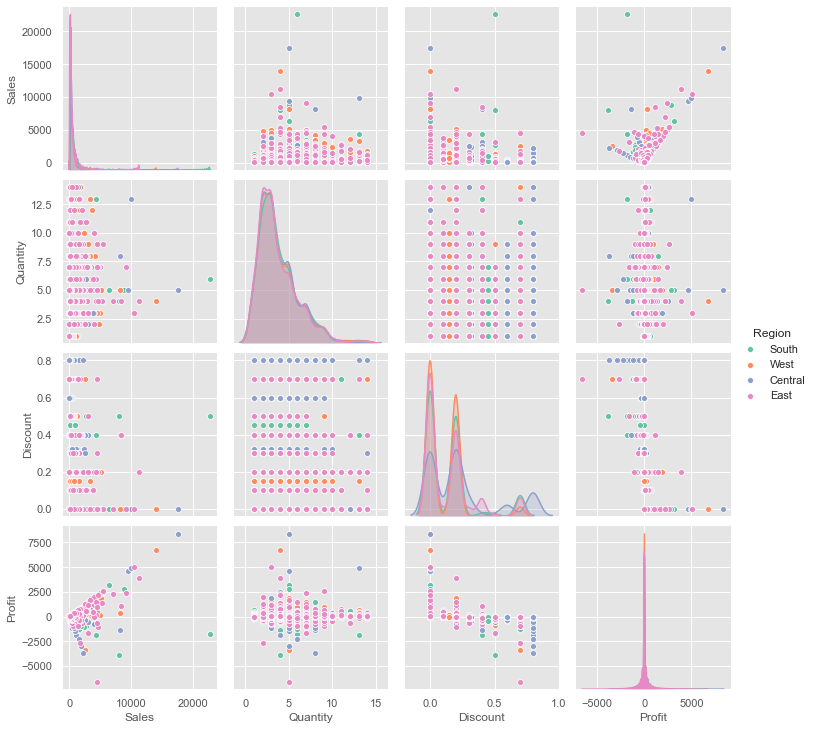

In [21]:
#based on different Regions
sns.pairplot(data, hue="Region", palette="Set2")
plt.show()

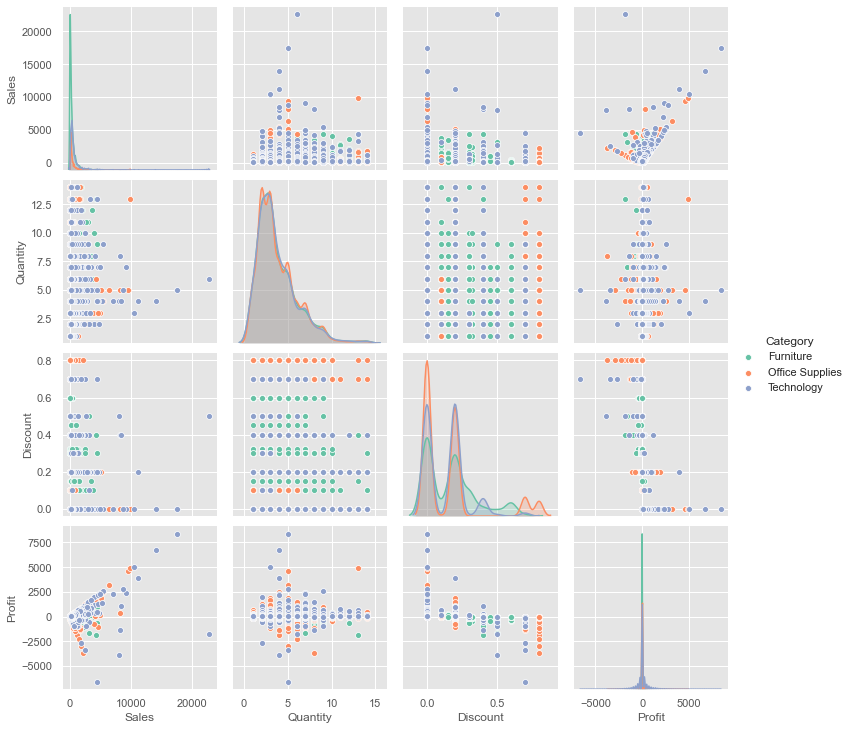

In [22]:
#based on different categories of products
sns.pairplot(data, hue="Category", palette="Set2")
plt.show()

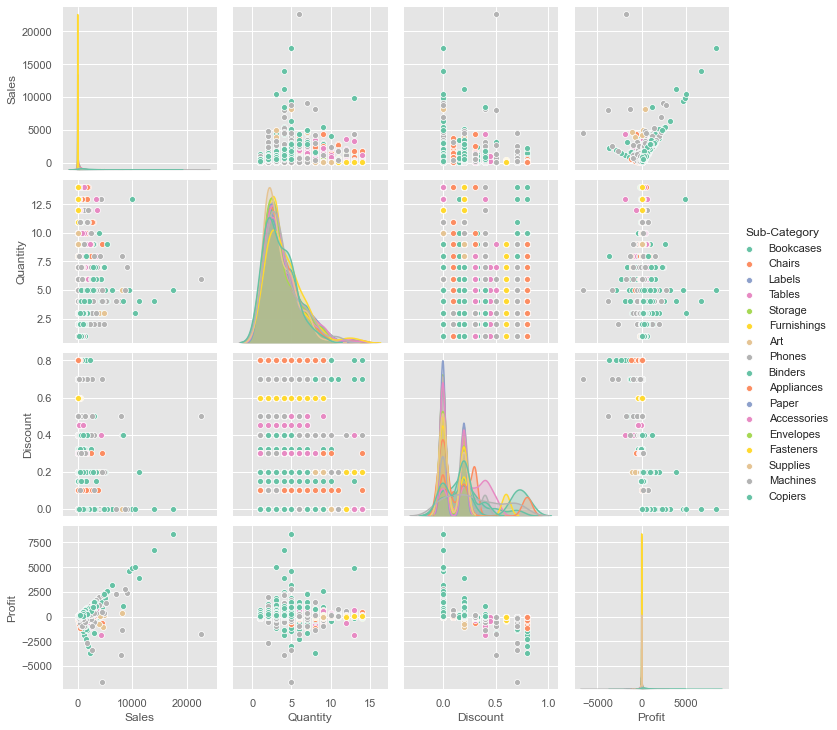

In [23]:
#based on different sub-categories of products
sns.pairplot(data, hue="Sub-Category", palette="Set2")
plt.show()

Text(0.5, 1.0, 'Category vs Sub Category')

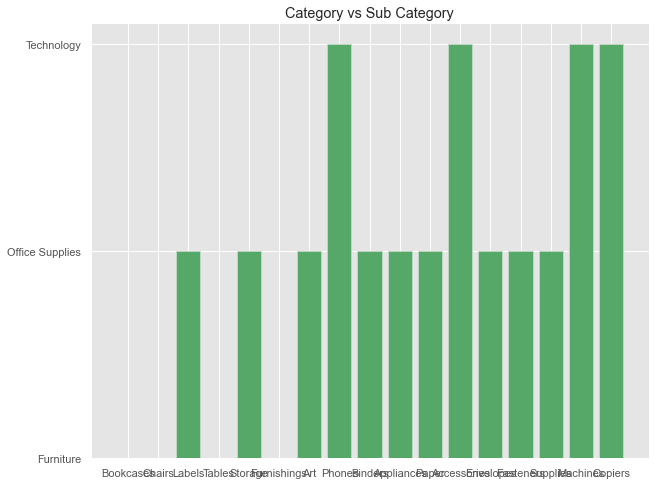

In [25]:
#lets see with diffrent angle

plt.figure(figsize=(10,8))
plt.bar('Sub-Category','Category',data=data, color='g');
plt.title('Category vs Sub Category')

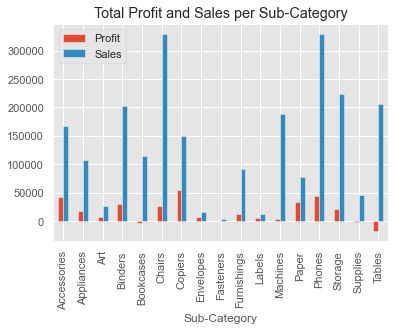

In [26]:
data.groupby('Sub-Category')['Profit','Sales'].agg(sum).plot.bar()
plt.title('Total Profit and Sales per Sub-Category');

The above barplot depicts a lot about the profit gained from selling various products. Though sales for various products is high but they have a very low profit margin. Sub_Categoried like Machines, Bookcases, Tables etc. may have high sale but the profit is very low or negative(in case of Tables). On the other hand products like Copiers, Paper comparitively have less sales but give more profit. 

In [28]:
data['Cost']=data['Sales']-data['Profit']
data['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [29]:
data['Profit %']=(data['Profit']/data['Cost'])*100
data.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').head()

Ship Mode      Segment           City           State   Region  \
1696    Second Class  Home Office        Bayonne      New Jersey     East   
2592    Second Class    Corporate    Summerville  South Carolina    South   
6338  Standard Class    Corporate  New York City        New York     East   
246     Second Class  Home Office      Lakeville       Minnesota  Central   
381      First Class    Corporate  San Francisco      California     West   
...              ...          ...            ...             ...      ...   
8916  Standard Class    Corporate         Austin           Texas  Central   
8766  Standard Class    Corporate     Fort Worth           Texas  Central   
9164  Standard Class     Consumer        Chicago        Illinois  Central   
261   Standard Class    Corporate       Pasadena           Texas  Central   
676   Standard Class     Consumer          Tyler           Texas  Central   

             Category Sub-Category    Sales  Quantity  Discount    Profit  \
1696       Technology       Phones  104.980         2       0.0   52.4900   
2592       Technology       Phones   79.100         2       0.0   39.5500   
6338       Technology       Phones   87.800         4       0.0   43.9000   
246   Office Supplies        Paper   47.880         6       0.0   23.9400   
381   Office Supplies        Paper   50.960         7       0.0   25.4800   
...               ...          ...      ...       ...       ...       ...   
8916  Office Supplies   Appliances   48.784         4       0.8 -131.7168   
8766  Office Supplies   Appliances   24.588         3       0.8  -67.6170   
9164  Office Supplies   Appliances  143.128         2       0.8 -393.6020   
261   Office Supplies   Appliances    1.624         2       0.8   -4.4660   
676   Office Supplies   Appliances    2.688         3       0.8   -7.3920   

          Cost    Profit %  
1696   52.4900  100.000000  
2592   39.5500  100.000000  
6338   43.9000  100.000000  
246    23.9400  100.000000  
381    25.4800  100.000000  
...        ...         ...  
8916  180.5008  -72.972973  
8766   92.2050  -73.333333  
9164  536.7300  -73.333333  
261     6.0900  -73.333333  
676    10.0800  -73.333333  

[2173 rows x 13 columns]

phones and paper are with 100% profit

In [30]:
# Count the total repeatable states
data['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

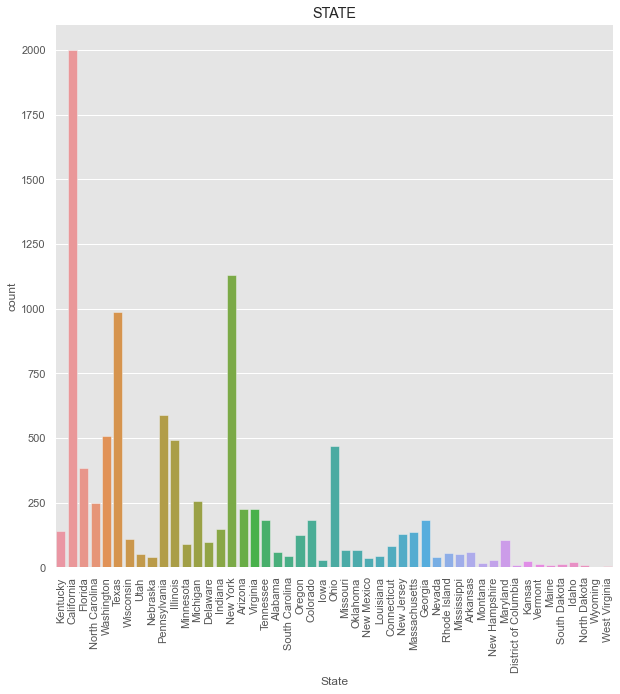

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

Sales count in states like California, Texas, New York are a lot higher than other states

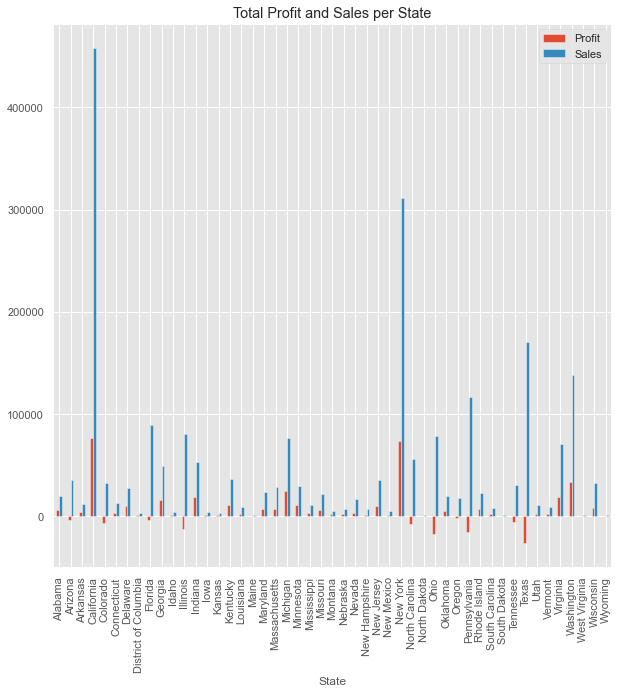

In [32]:
data.groupby('State')['Profit','Sales'].agg(sum).plot.bar(figsize=(10,10))
plt.title('Total Profit and Sales per State');

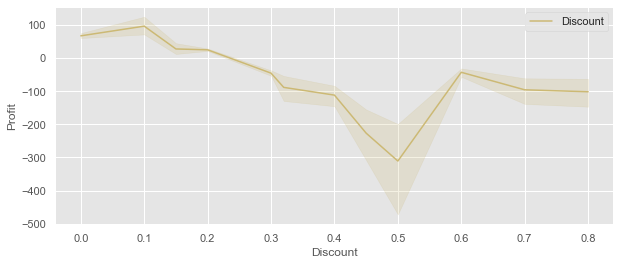

In [33]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=data , color='y',label='Discount')
plt.legend()
plt.show()

### Now, let us analyze the sales of a few random states from each profit bracket (high profit, medium profit, low profit, low loss and high loss) and try to observe some crucial trends which might help us in increasing the sales

In [34]:
def state_data_viewer(states):
    product_data = data.groupby(['State'])
    for state in states:
        data1 = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (24,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data1.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

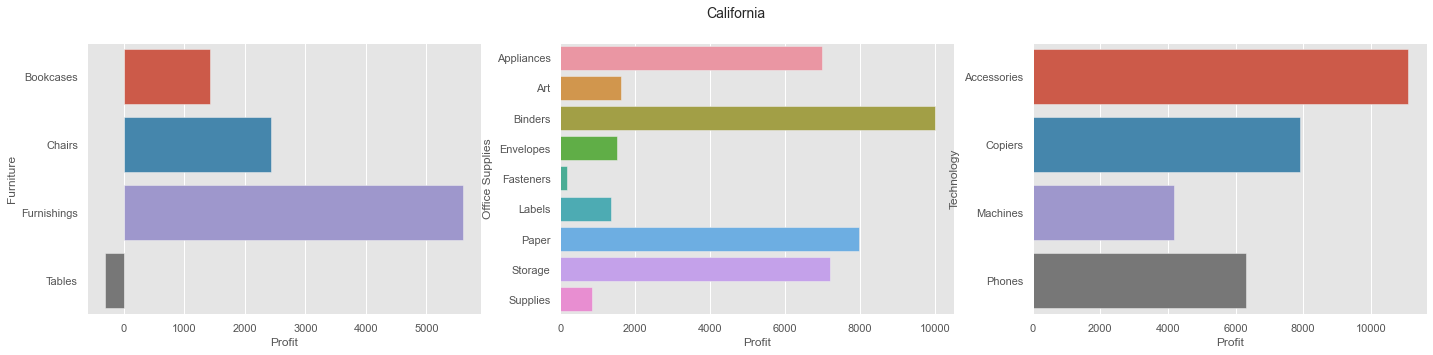

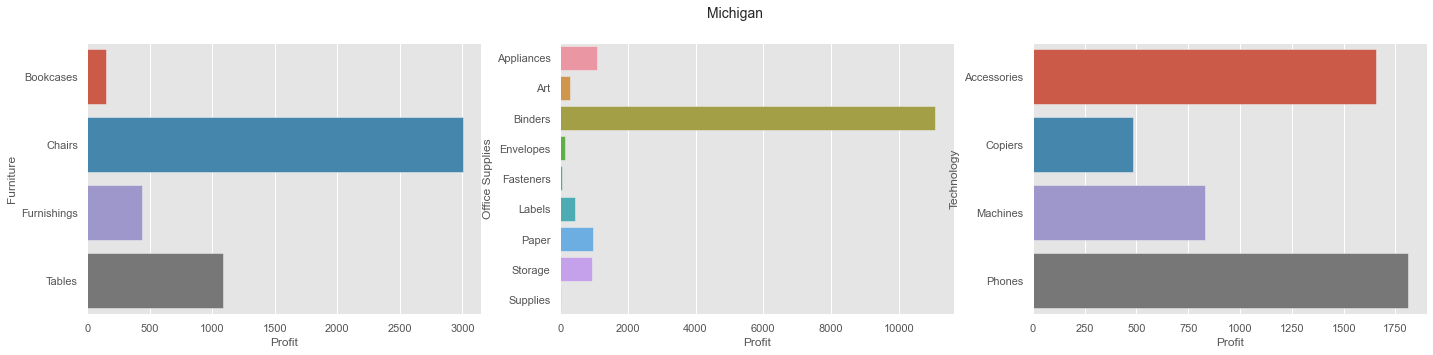

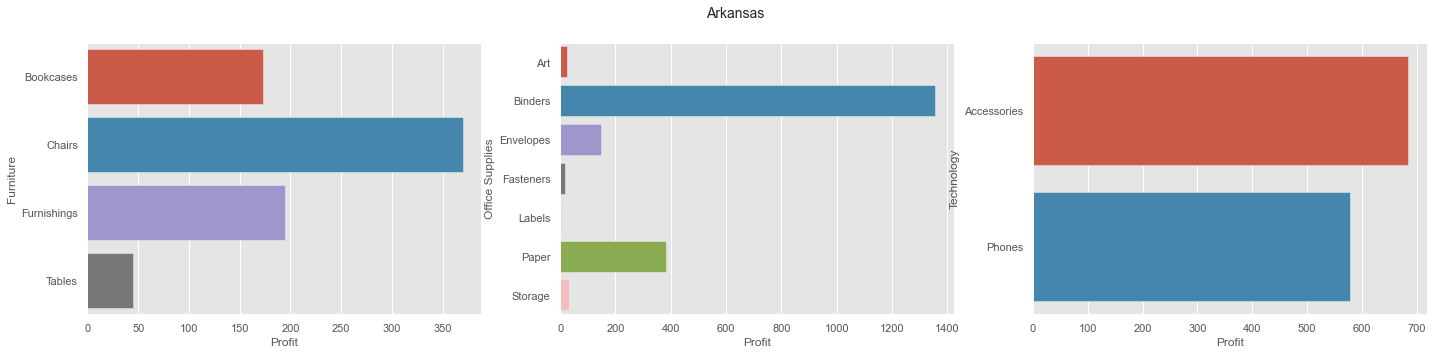

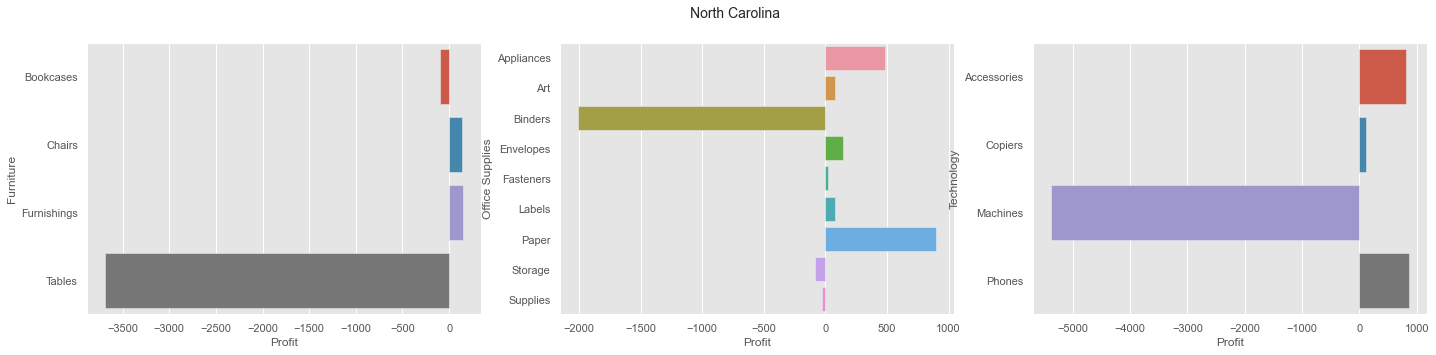

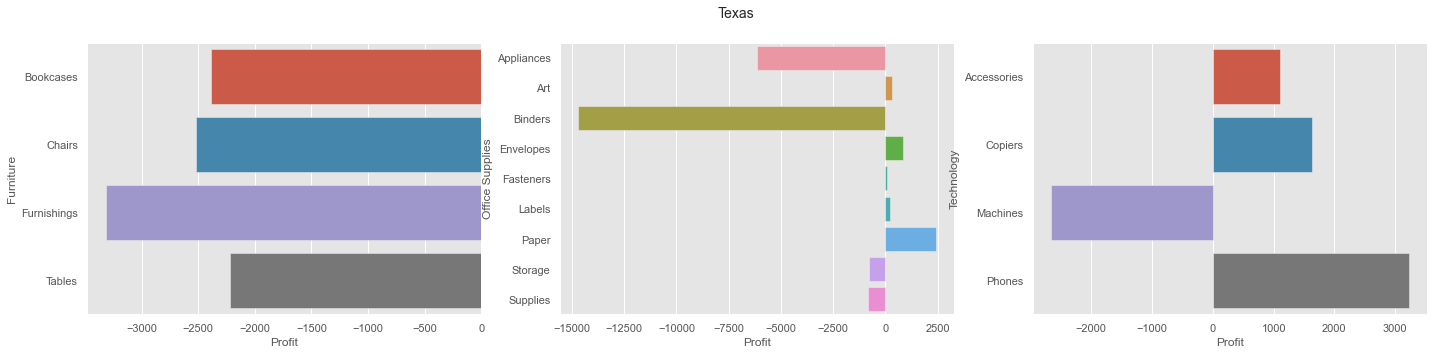

In [35]:
states = ['California', 'Michigan', 'Arkansas', 'North Carolina', 'Texas']
state_data_viewer(states)

From the Above data Visualization we can see that in which States and in which Category the Sales and profits are High or less, we can improve in that States by providing Discounts in prefered range so that company and cosumer both will be in profit.

# Now...lets the fun begin with some magic of automation

A picture is worth a thousand words

In [36]:
import pandas_profiling as pp

In [37]:
report=pp.ProfileReport(data)
report